# Boston Housing Dataset

More information in [this kaggle link](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices)

## Rows
Each row describes a Boston suburb or town.

## Columns
* `Unnamed: 0`: index
* `crim`: Crime rate per capita by town
* `zn`: proportion of residential land zoned for lots over 25000 square feet
* `indus`: proportion of non-retail business acres per town
* `chas`: Charles River dummy variable - 1 if tract bounds river, 0 otherwise
* `nox`: Nitric Oxide (NO) concentration (parts per 10 million)
* `rm`: average number of rooms per dwelling
* `age`: proportion of owner occupied units built prior to 1940
* `dis`: weighted distances to five Boston employment centres
* `rad`: index of accessibility to radial highways
* `tax`: full value property tax rate per $10000
* `ptratio`: pupil/teacher ratio by town
* `lstat`: percentage lower status of the population
* `medv`: median value of owner occupied homes in $1000's

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv('Boston.csv', index_col='Unnamed: 0')

In [3]:
boston.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [5]:
rows, cols = boston.shape
print('The dataset has {} rows and {} columns'.format(rows, cols))

The dataset has 506 rows and 13 columns


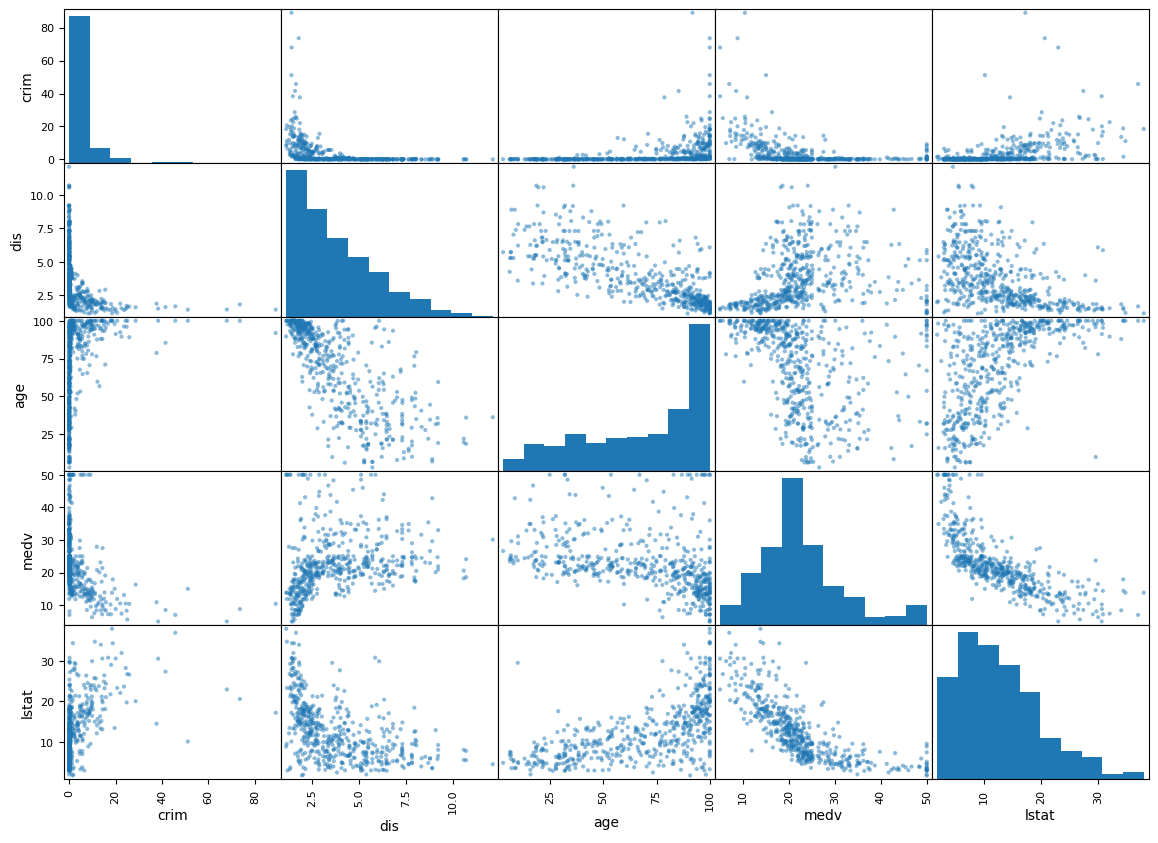

In [6]:
cols_scatter_for_crime = ['crim', 'dis', 'age', 'medv', 'lstat']
all_cols = boston.columns
pd.plotting.scatter_matrix(boston[cols_scatter_for_crime], figsize=(14,10));

We can see that the columns `['crim', 'age', 'dis', 'lstat', 'medv']` are related somehow with `crim` column.

By looking at the pairwise scatter plots, the ordering of importance would be approximately:

1. `dis` (strong inverse relation). The crime rate decreases when the distance to employment centers increases. The more closer to employment centers the suburb is, the more crime there is.
2. `age` (direct relation). When the proportion of owner occupied units increases, the crime rate also increases.
3. `medv` (weak inverse relation). Lower prices have more crime rates.
4. `lstat` (weak direct relation).

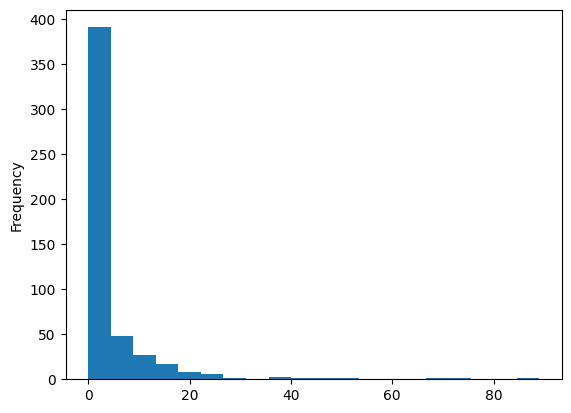

In [13]:
boston['crim'].plot.hist(bins=20);

In [14]:
boston[['crim', 'tax', 'ptratio']].describe()

,crim,tax,ptratio
count,506.000000,506.000000,506.000000
mean,3.613524,408.237154,18.455534
std,8.601545,168.537116,2.164946
min,0.006320,187.000000,12.600000
25%,0.082045,279.000000,17.400000
50%,0.256510,330.000000,19.050000
75%,3.677083,666.000000,20.200000
max,88.976200,711.000000,22.000000


<Axes: >

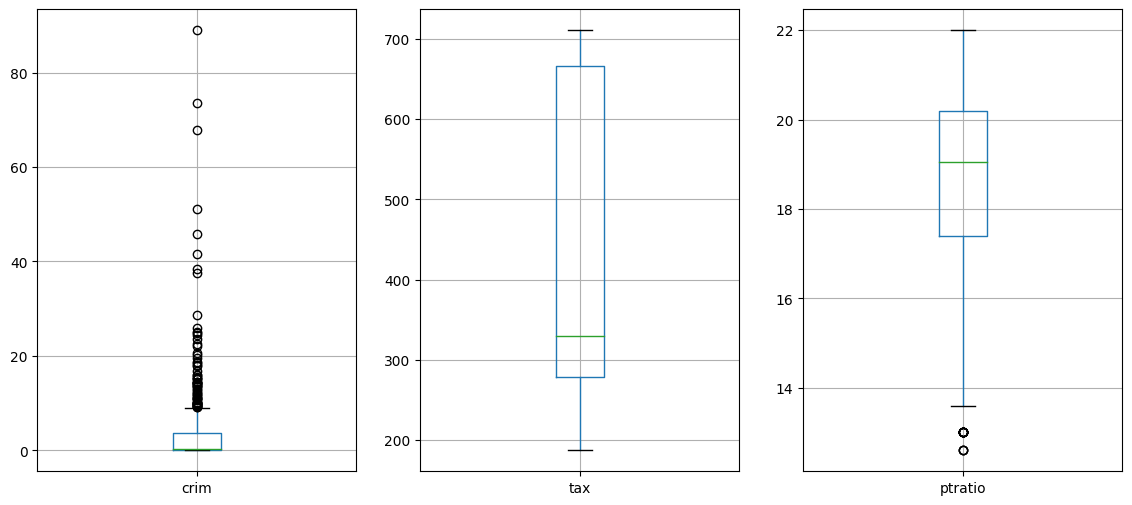

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))
boston.boxplot(column='crim', ax=ax[0])
boston.boxplot(column='tax', ax=ax[1])
boston.boxplot(column='ptratio', ax=ax[2])

Number of suburbs bound by the Charles river: 35


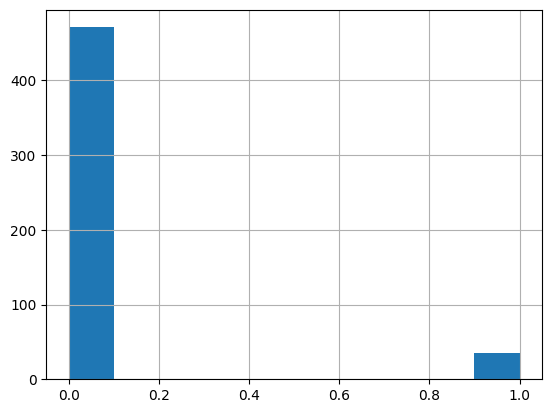

In [34]:
# Count how many suburbs bound the Charles river
#n = boston['chas'].sum()
n = boston.loc[boston['chas'] == 1].shape[0]
print('Number of suburbs bound by the Charles river:', n)
boston['chas'].hist();

In [36]:
# Median pupil-teacher ratio
boston['ptratio'].median()

19.05